# Project 9 -- Arnav Surve

**TA Help:** N/A
    
**Collaboration:** N/A


## Question 1

In [1]:
library(data.table)

In [2]:
myDF <- fread("/anvil/projects/tdm/data/election/escaped/itcont2020sample.txt")

In [3]:
head(myDF)

CMTE_ID,AMNDT_IND,RPT_TP,TRANSACTION_PGI,IMAGE_NUM,TRANSACTION_TP,ENTITY_TP,NAME,CITY,STATE,...,EMPLOYER,OCCUPATION,TRANSACTION_DT,TRANSACTION_AMT,OTHER_ID,TRAN_ID,FILE_NUM,MEMO_CD,MEMO_TEXT,SUB_ID
<chr>,<chr>,<chr>,<chr>,<int64>,<chr>,<chr>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<int64>
C00401224,N,YE,,202001299174394423,24T,IND,"SOLOMON, VICTOR",CAPE CORAL,FL,...,RETIRED,NOT EMPLOYED,7112019,15,C00042366,SA11AI_165851302,1378435,,EARMARKED FOR DSCC (C00042366),4030220201233264164
C00401224,N,M4,P,202004219229686792,24T,IND,"MYERS, ELIZABETH",SCOTTSVILLE,NY,...,NOT EMPLOYED,NOT EMPLOYED,3042020,39,C00696948,SA11AI_216676150,1402724,,EARMARKED FOR BERNIE 2020 (C00696948),4051420201750154629
C00193433,N,YE,P,202001219167282616,15,IND,"HASKINS, GEORGE",HARTSDALE,NY,...,NOT EMPLOYED,NOT EMPLOYED,12182019,15,,6260719,1371576,,,4012220201685443186
C00401224,N,YE,,202001299171436527,24T,IND,"KOLBE, NINA",WASHINGTON,DC,...,SELF,HEALTH PROFESSIONAL,8302019,10,C00637074,SA11AI_174544101,1378435,,EARMARKED FOR FINKENAUER FOR CONGRESS (C00637074),4030220201214307726
C00401224,N,MY,,201907299161204221,24T,IND,"ESSENBERG, PENNY",GRAND RAPIDS,MI,...,,,3212019,16,C00580068,SB28A_145393165,1344765,,"REFUND OF CONTRIBUTION, INITIALLY EARMARKED FOR PROGRESSIVE TURNOUT PROJECT (C00580068)",4082820191108588209
C00618371,N,Q3,P,201910159164412175,15,IND,"GIEBEL, BETTY",KISSIMMEE,FL,...,HOMEMAKER,HOMEMAKER,7112019,42,,SA11AI.178611,1358506,,,4101820191674758801


In [4]:
benfords_law <- function(digit) { log((digit+1)/digit)/log(10) }

In [5]:
benfords_law(1)

[1] 0.30103

In [6]:
digits <- 1:9

In [7]:
digits

[1] 1 2 3 4 5 6 7 8 9

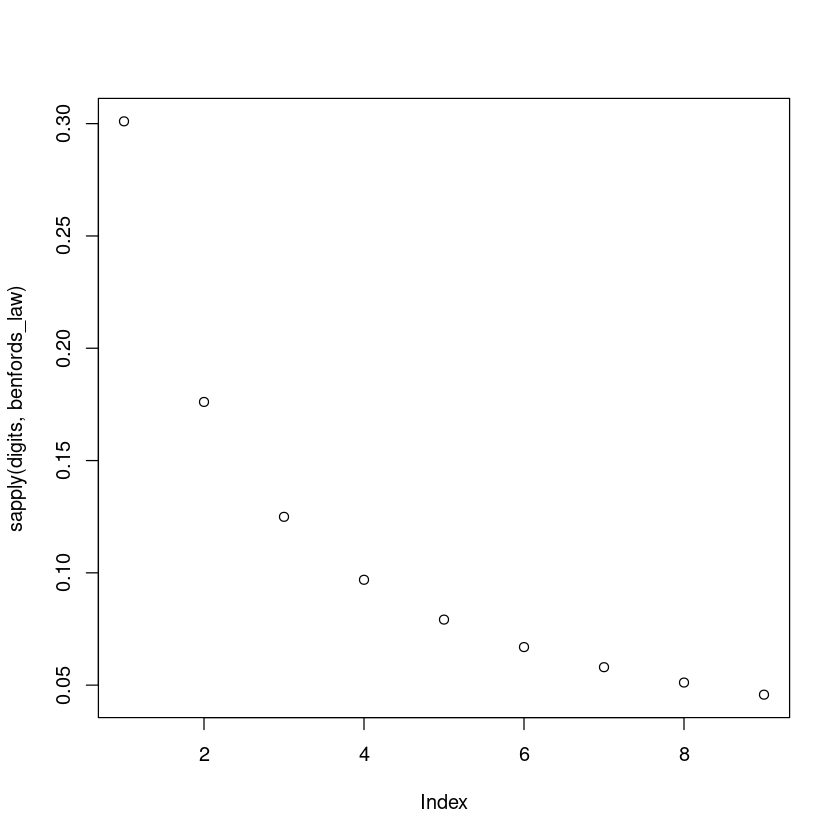

In [8]:
plot(sapply(digits, benfords_law))

a. Cell 15

b. Cell 17

c. Cell 19

## Question 2

In [9]:
options(jupyter.rich_display = F)

In [10]:
options(repr.matrix.max.cols=25, repr.matrix.max.rows=200)

In [11]:
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00401224 N         M4     P               202004219229686792 24T           
3 C00193433 N         YE     P               202001219167282616 15            
4 C00401224 N         YE                     202001299171436527 24T           
5 C00401224 N         MY                     201907299161204221 24T           
6 C00618371 N         Q3     P               201910159164412175 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY  

In [12]:
firstdigit <- table(substr(myDF$TRANSACTION_AMT, 1, 1))[3:11]

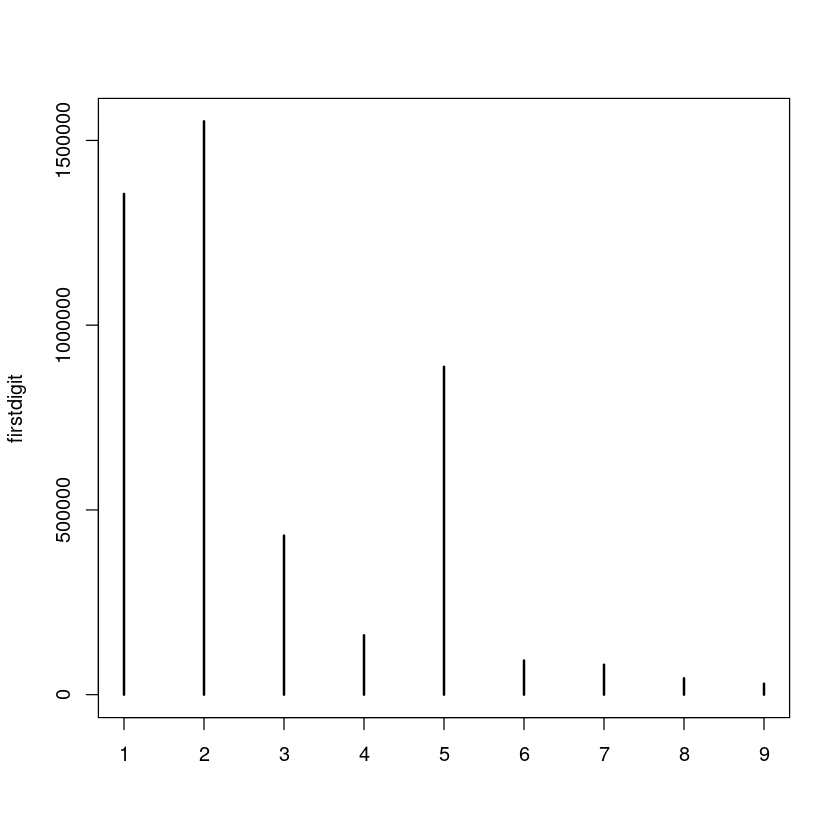

In [13]:
plot(firstdigit)

a. Cell 2

b. Cell 28

c. For the most part, the plot seems to roughly be following Bedford's law as the values for most of the digits seem to be decreasing similarly to how we saw in the elections data, excluding 2 and 5.

## Question 3

In [14]:
myDF$Employed <- TRUE

In [15]:
myDF$Employed[myDF$EMPLOYER == "NOT EMPLOYED"] <- FALSE

In [16]:
myDF$Employed[myDF$OCCUPATION == "NOT EMPLOYED"] <- FALSE

In [17]:
table(myDF$Employed)


  FALSE    TRUE 
1136507 3542255 

In [18]:
myemployerfunction <- function(tempDF) {
    tempDF$Employed <- TRUE
    tempDF$Employed[myDF$EMPLOYER == "NOT EMPLOYED"] <- FALSE
    tempDF$Employed[myDF$OCCUPATION == "NOT EMPLOYED"] <- FALSE
    return(tempDF)
}

In [19]:
head(myemployerfunction(myDF))

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00401224 N         M4     P               202004219229686792 24T           
3 C00193433 N         YE     P               202001219167282616 15            
4 C00401224 N         YE                     202001299171436527 24T           
5 C00401224 N         MY                     201907299161204221 24T           
6 C00618371 N         Q3     P               201910159164412175 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY  

In [20]:
table(myemployerfunction(myDF)$Employed)


  FALSE    TRUE 
1136507 3542255 

## Question 4

In [21]:
myemployerfunction <- function(tempDF) { # Function has 1 argument
    tempDF$Employed <- TRUE # Set Employed column with default values true
    tempDF$Employed[myDF$EMPLOYER == "NOT EMPLOYED"] <- FALSE # If employer was not employed, set index to false
    tempDF$Employed[myDF$OCCUPATION == "NOT EMPLOYED"] <- FALSE # If occupation was not employed, set index to false
    return(tempDF)
}

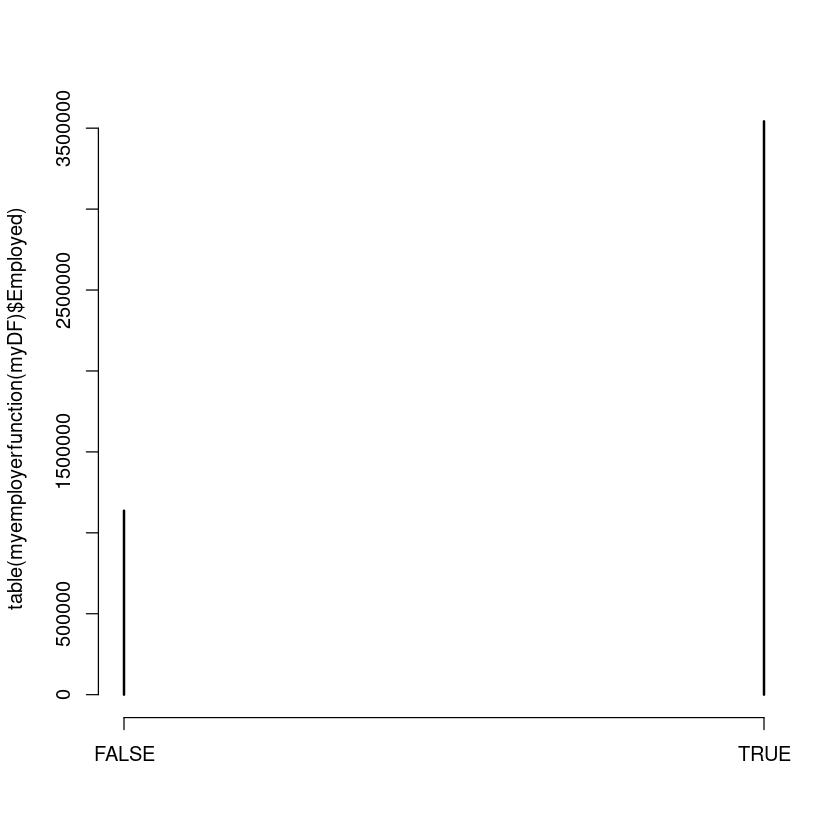

In [22]:
plot(table(myemployerfunction(myDF)$Employed))

## Question 5

In [23]:
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM          TRANSACTION_TP
1 C00401224 N         YE                     202001299174394423 24T           
2 C00401224 N         M4     P               202004219229686792 24T           
3 C00193433 N         YE     P               202001219167282616 15            
4 C00401224 N         YE                     202001299171436527 24T           
5 C00401224 N         MY                     201907299161204221 24T           
6 C00618371 N         Q3     P               201910159164412175 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY  

In [24]:
head(myDF$STATE, n=50)

 [1] "FL" "NY" "NY" "DC" "MI" "FL" "IA" "WI" "NJ" "TX" "TX" "NY" "IL" "WA" "DC"
[16] "DC" "OK" "WI" "CT" "MA" "NY" "CT" "VA" "PA" "SC" "SC" "NE" "KY" "PA" "VT"
[31] "MA" "MA" "CA" "IA" "IN" "WI" "MT" "NY" "MO" "CA" "IL" "CA" "VA" "CO" "FL"
[46] "TN" "MI" "MA" "CA" "MA"

In [37]:
caRatio <- function(tempDF, includes) {
    tempDF$state <- FALSE
    tempDF$state[myDF$STATE == 'CA'] <- includes
    return(tempDF)
}

In [38]:
table(caRatio(myDF, TRUE))

ERROR: Error in table(caRatio(myDF, TRUE)): attempt to make a table with >= 2^31 elements


Markdown notes and sentences and analysis written here.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.